Collect data

In [205]:
# import yfinance as yf
# import pandas as pd
# from datetime import datetime, timedelta

# # Stock ticker for YES BANK on NSE
# ticker = "YESBANK.NS"

# # Define start and end date (last 2 years)
# end_date = datetime.today().strftime('%Y-%m-%d')
# start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y-%m-%d')

# # Download historical data
# data = yf.download(ticker, start=start_date, end=end_date)

# # Save to CSV
# data.to_csv("YESBANK_last2years.csv")

# print("Dataset saved as YESBANK_last2years.csv")
# print(data.head())

In [206]:
!pip install ta
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [207]:
data=pd.read_csv("/content/YESBANK_last2years_renamed.csv")

In [208]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2023-08-21,16.950001,17.049999,16.750000,16.900000,79437088
1,2023-08-22,16.950001,17.049999,16.850000,17.000000,76696780
2,2023-08-23,17.000000,17.299999,16.950001,17.049999,103711610
3,2023-08-24,16.950001,17.200001,16.900000,17.100000,65221207
4,2023-08-25,16.850000,17.049999,16.799999,16.950001,57171325


**Data** Preprocessing

In [209]:
data.shape

(492, 6)

In [210]:
data.isnull().count()

,0
Date,492
Close,492
High,492
Low,492
Open,492
Volume,492


In [211]:
data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    492 non-null    object 
 1   Close   492 non-null    float64
 2   High    492 non-null    float64
 3   Low     492 non-null    float64
 4   Open    492 non-null    float64
 5   Volume  492 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 23.2+ KB


Handle missing value

In [213]:
def plot_boxplot(data,column_name):

  plt.figure(figsize=(5,3))
  sns.boxplot(y=data[column_name])
  plt.title(f"Box plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()


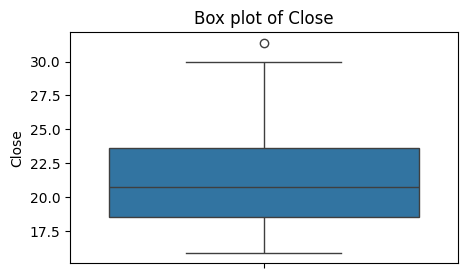

In [214]:
plot_boxplot(data,"Close")

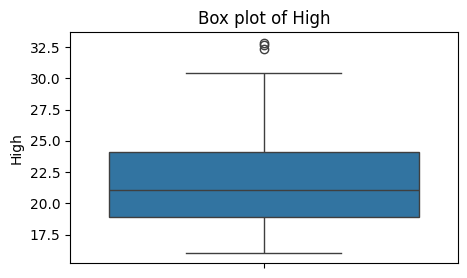

In [215]:
plot_boxplot(data,'High')

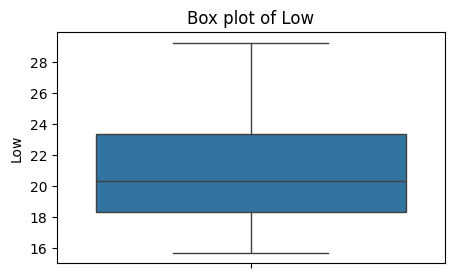

In [216]:
plot_boxplot(data,'Low')

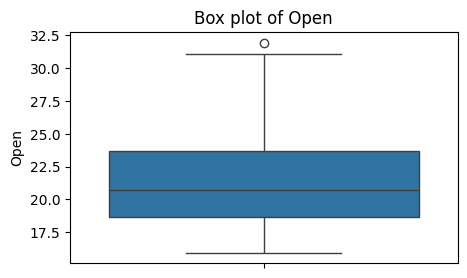

In [217]:
plot_boxplot(data,'Open')

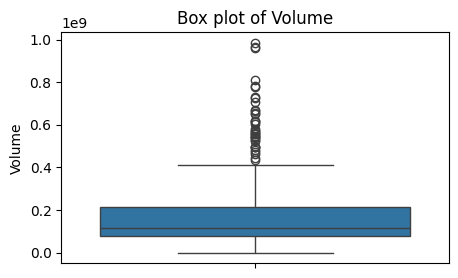

In [218]:
plot_boxplot(data,'Volume')

Handling outliers(IQR Method)

In [219]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower, upper=upper) # Removed axis argument

# Apply outlier handling on key price columns
for col in [('Open'), ('High'), ('Low'), ('Close'),('Volume')]: # Using correct MultiIndex column names
    remove_outliers_iqr(data, col)

print("Outliers handled using IQR method.")


Outliers handled using IQR method.


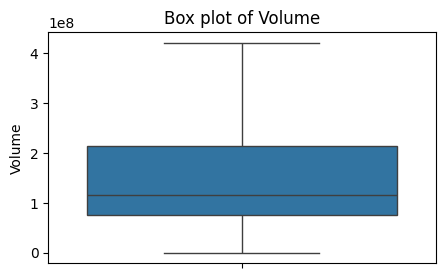

In [220]:
plot_boxplot(data,"Volume")

Feature Engineering

In [221]:
data.describe()

,Close,High,Low,Open,Volume
count,492.000000,492.000000,492.000000,492.000000,4.920000e+02
mean,21.052025,21.458920,20.765711,21.122228,1.590591e+08
std,3.001680,3.149721,2.907678,3.040811,1.123318e+08
min,15.900000,16.049999,15.700000,15.950000,0.000000e+00
25%,18.549999,18.902500,18.292500,18.629999,7.602460e+07
50%,20.724999,21.100000,20.304999,20.745000,1.159437e+08
75%,23.612501,24.100000,23.342500,23.712501,2.143047e+08
max,31.206253,31.896251,29.250000,31.336253,4.217248e+08


Data visualization

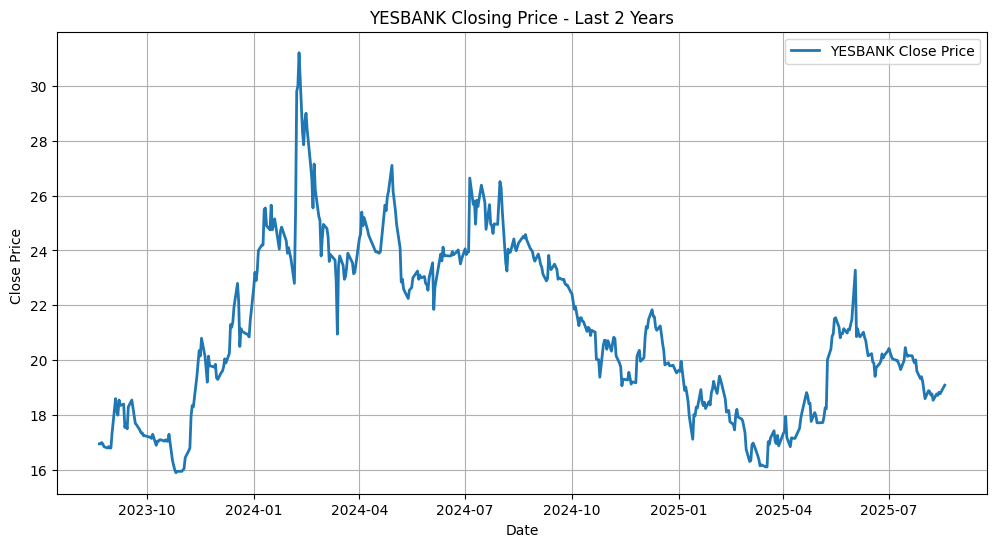

In [222]:
data['Date'] = pd.to_datetime(data['Date'])

# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label="YESBANK Close Price", linewidth=2)

# Formatting
plt.title("YESBANK Closing Price - Last 2 Years")
plt.xlabel("Date")
plt.ylabel("Close Price ")
plt.legend()
plt.grid(True)
plt.show()

In [223]:
data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

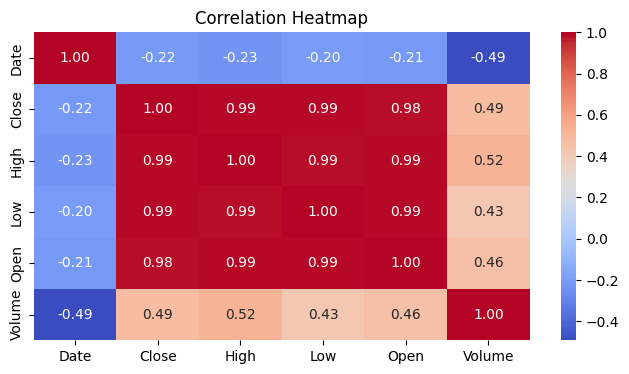

In [225]:
#correlation matrix-heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data[["Date","Close","High","Low","Open","Volume"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Train and test the model

In [227]:
from datetime import datetime

data['Date'] = pd.to_datetime(data['Date'])   # ensure datetime format
data['Date_ordinal'] = data['Date'].map(datetime.toordinal)

print(data[['Date', 'Date_ordinal']].head())


        Date  Date_ordinal
0 2023-08-21        738753
1 2023-08-22        738754
2 2023-08-23        738755
3 2023-08-24        738756
4 2023-08-25        738757


In [228]:
X = data[["Date_ordinal", "Open", "High", "Low", "Volume"]]

Y=data["Close"]

In [229]:
# Apply MinMax normalization on X and Y
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

In [230]:
print(X_scaled)

[[0.         0.06174342 0.0631064  0.07749079 0.1883624 ]
 [0.00137363 0.06824275 0.0631064  0.08487089 0.18186454]
 [0.00274725 0.07149235 0.07888301 0.09225099 0.2459225 ]
 ...
 [0.99313187 0.18328053 0.17796016 0.21771216 0.08952503]
 [0.99450549 0.18718008 0.17859112 0.22287819 0.07360939]
 [1.         0.19237953 0.19752311 0.2346863  0.11429062]]


In [231]:
print(Y_scaled)

[[0.06859949]
 [0.06859949]
 [0.07186608]
 [0.06859949]
 [0.06206619]
 [0.05879947]
 [0.06206619]
 [0.05879947]
 [0.05879947]
 [0.09473257]
 [0.17639854]
 [0.14699874]
 [0.13719885]
 [0.17313183]
 [0.16006535]
 [0.16333194]
 [0.10779905]
 [0.11759907]
 [0.10453247]
 [0.15679864]
 [0.17313183]
 [0.13719885]
 [0.11759907]
 [0.11433236]
 [0.10126588]
 [0.09473257]
 [0.09473257]
 [0.08819927]
 [0.08819927]
 [0.08493268]
 [0.08493268]
 [0.08166597]
 [0.09146586]
 [0.06533278]
 [0.07513267]
 [0.07513267]
 [0.07839938]
 [0.07839938]
 [0.07513267]
 [0.07839938]
 [0.07513267]
 [0.07513267]
 [0.09146586]
 [0.0293998 ]
 [0.0065333 ]
 [0.        ]
 [0.00326665]
 [0.00326665]
 [0.00326665]
 [0.0065333 ]
 [0.00979989]
 [0.0359331 ]
 [0.05226629]
 [0.05879947]
 [0.13393226]
 [0.16006535]
 [0.15679864]
 [0.22866471]
 [0.2907309 ]
 [0.27766429]
 [0.32013057]
 [0.27766429]
 [0.24826462]
 [0.21559823]
 [0.27766429]
 [0.2547978 ]
 [0.25153121]
 [0.25806451]
 [0.22539812]
 [0.22213141]
 [0.2384646 ]
 [0.24

In [232]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [233]:
print(X.shape,X_train.shape,X_test.shape)


(492, 5) (393, 5) (99, 5)


In [234]:
print(Y.shape,Y_train.shape,Y_test.shape)

(492,) (393, 1) (99, 1)


In [235]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, Y_train)

# Predictions
y_pred = rf.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [236]:

print("R² Score:", r2_score(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))
print("RMSE:", mean_squared_error(Y_test, y_pred))


R² Score: 0.9864204919441057
MAE: 0.012031595922446497
RMSE: 0.000360716197748985


In [237]:
# Accuracy of Random Forest in percentage
accuracy = r2_score(Y_test, y_pred) * 100
print(f"Random Forest Accuracy: {accuracy:.2f}%")


Random Forest Accuracy: 98.64%


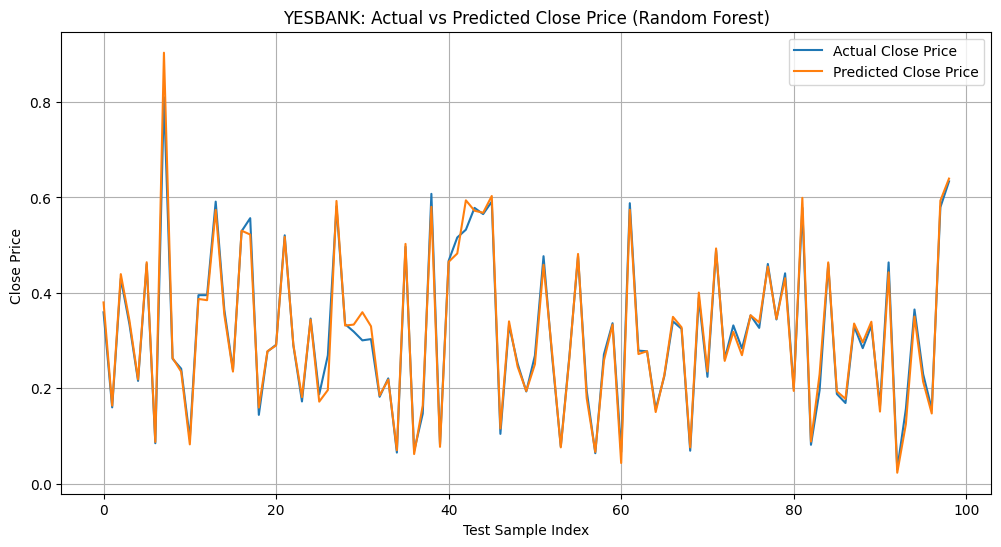

In [238]:
plt.figure(figsize=(12,6))
plt.plot(Y_test, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")

plt.title("YESBANK: Actual vs Predicted Close Price (Random Forest)")
plt.xlabel("Test Sample Index")
plt.ylabel("Close Price ")
plt.legend()
plt.grid(True)
plt.show()

Decision Tree -model

In [239]:
model=DecisionTreeRegressor(random_state=42)

In [240]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

In [241]:
d_predict=model.predict(X_test)

In [242]:

print("R² Score:", r2_score(Y_test, d_predict))
print("MAE:", mean_absolute_error(Y_test, d_predict))
print("RMSE:", mean_squared_error(Y_test, d_predict))


R² Score: 0.9889419725626254
MAE: 0.012914779186986953
RMSE: 0.0002937374163626165


In [243]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

In [244]:
print("R² Score:", r2_score(Y_test, lr_pred))
print("MAE:", mean_absolute_error(Y_test, lr_pred))
print("RMSE:", mean_squared_error(Y_test, lr_pred))


R² Score: 0.9943530454871434
MAE: 0.008744477515170393
RMSE: 0.00015000160185146973


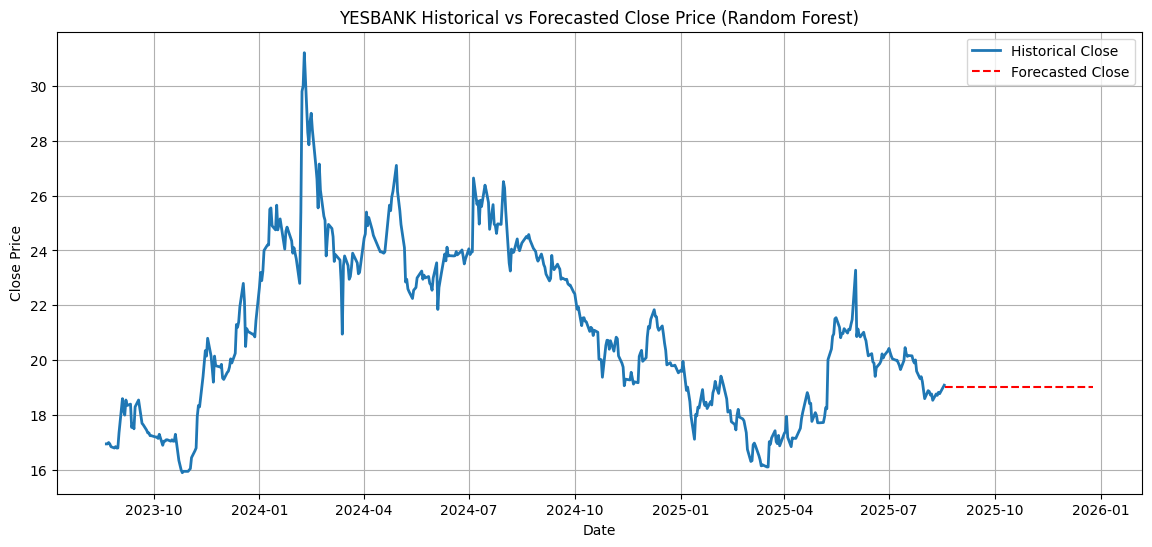

Predicted YESBANK Close Price on 25-12-2025: 19.022650156021125


In [246]:
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Generate future dates till 25-12-2025
last_date_value = data["Date"].max() # Access the date value from the last row
future_end_date = datetime(2025, 12, 25)
future_dates = pd.date_range(start=last_date_value + timedelta(days=1), end=future_end_date)

# Use last known OHLCV as proxy for all future days
last_row = data.iloc[-1]
future_df = pd.DataFrame({
    "Date": future_dates,
    "Open": last_row["Open"],
    "High": last_row["High"],
    "Low": last_row["Low"],
    "Volume": last_row["Volume"]
})

# Add Date_ordinal
future_df["Date_ordinal"] = future_df["Date"].map(datetime.toordinal)

# Match feature order
X_future = future_df[["Date_ordinal", "Open", "High", "Low", "Volume"]]

# Scale
X_future_scaled = scaler_X.transform(X_future)

# Predict scaled Close
future_pred_scaled = rf.predict(X_future_scaled)

# Inverse transform to real Close
future_pred = scaler_Y.inverse_transform(future_pred_scaled.reshape(-1,1))

# Add predictions to DataFrame
future_df["Predicted_Close"] = future_pred

# Plot historical + forecast
plt.figure(figsize=(14,6))
plt.plot(data["Date"], data["Close"], label="Historical Close", linewidth=2) # Use Date column for historical plot
plt.plot(future_df["Date"], future_df["Predicted_Close"], label="Forecasted Close", color="red", linestyle="--")

plt.title("YESBANK Historical vs Forecasted Close Price (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Print predicted price for 25-12-2025
predicted_2025 = future_df.loc[future_df["Date"] == future_end_date, "Predicted_Close"].values[0]
print("Predicted YESBANK Close Price on 25-12-2025:", predicted_2025)

In [247]:
import pickle

pickle.dump(scaler_X, open("scaler_X.pkl", "wb"))
pickle.dump(scaler_Y, open("scaler_Y.pkl", "wb"))


In [248]:
import pickle

with randomforest

In [249]:
filename='mini_stock.pkl'
pickle.dump(rf,open(filename,'wb'))

In [250]:
loaded_model=pickle.load(open(filename,'rb'))

with linear regression

In [251]:
file='mini_stock_linear.pkl'
pickle.dump(lr,open(file,'wb'))

In [252]:
load_model=pickle.load(open(file,'rb'))

with decision tree

In [253]:
file_tree='mini_stock_tree.pkl'
pickle.dump(model,open(file_tree,'wb'))

In [254]:
load_tree_model=pickle.load(open(file_tree,'rb'))

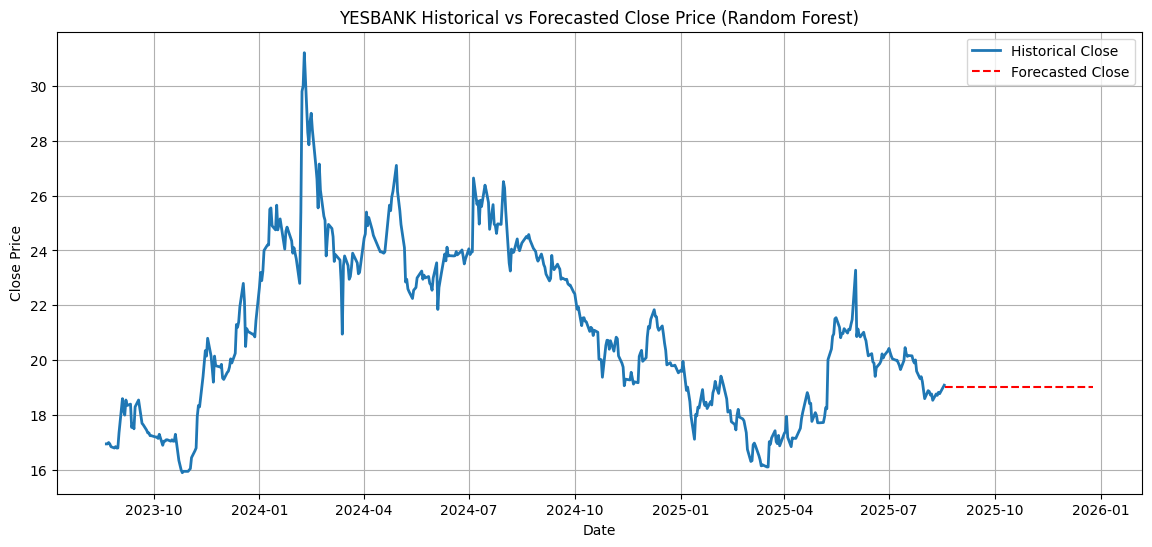

Predicted YESBANK Close Price on 25-12-2025: 19.022650156021125


In [255]:
#using random forest
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Generate future dates till 25-12-2025
last_date_value = data["Date"].max() # Access the date value from the last row
future_end_date = datetime(2025, 12, 25)
future_dates = pd.date_range(start=last_date_value + timedelta(days=1), end=future_end_date)

# Use last known OHLCV as proxy for all future days
last_row = data.iloc[-1]
future_df = pd.DataFrame({
    "Date": future_dates,
    "Open": last_row["Open"],
    "High": last_row["High"],
    "Low": last_row["Low"],
    "Volume": last_row["Volume"]

})

# Add Date_ordinal
future_df["Date_ordinal"] = future_df["Date"].map(datetime.toordinal)

# Match feature order
X_future = future_df[["Date_ordinal", "Open", "High", "Low", "Volume"]]

# Scale
X_future_scaled = scaler_X.transform(X_future)

# Predict scaled Close
future_pred_scaled = loaded_model.predict(X_future_scaled)

# Inverse transform to real Close
future_pred = scaler_Y.inverse_transform(future_pred_scaled.reshape(-1,1))

# Add predictions to DataFrame
future_df["Predicted_Close"] = future_pred

# Plot historical + forecast
plt.figure(figsize=(14,6))
plt.plot(data["Date"], data["Close"], label="Historical Close", linewidth=2)
plt.plot(future_df["Date"], future_df["Predicted_Close"], label="Forecasted Close", color="red", linestyle="--")

plt.title("YESBANK Historical vs Forecasted Close Price (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Print predicted price for 25-12-2025
predicted_2025 = future_df.loc[future_df["Date"] == future_end_date, "Predicted_Close"].values[0]
print("Predicted YESBANK Close Price on 25-12-2025:", predicted_2025)

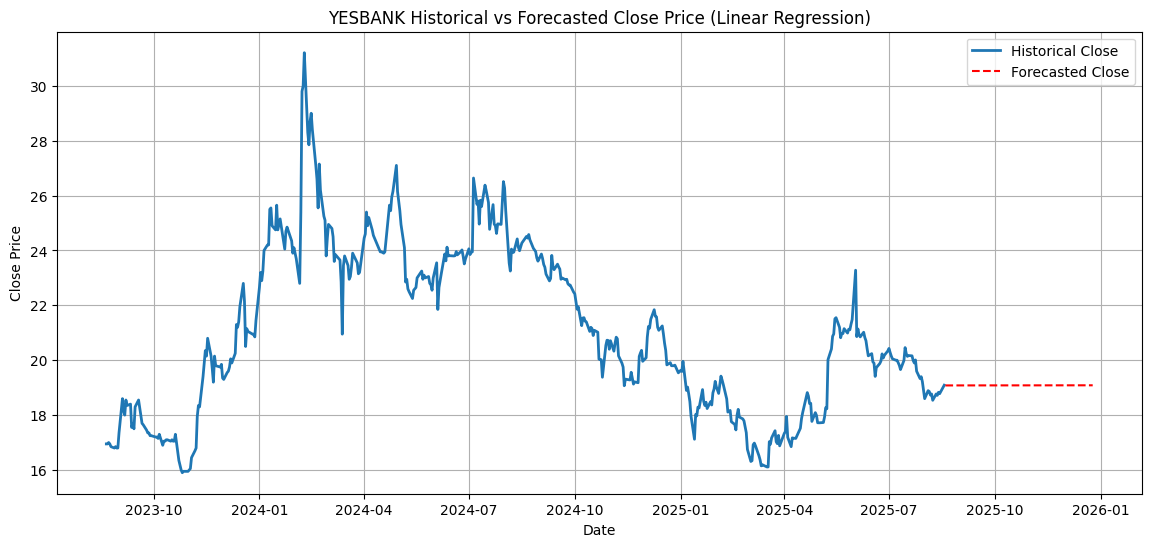

Predicted YESBANK Close Price on 25-12-2025: 19.086034976052424


In [256]:
#using linear regression
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Generate future dates till 25-12-2025
last_date_value = data["Date"].max() # Access the date value from the last row
future_end_date = datetime(2025, 12, 25)
future_dates = pd.date_range(start=last_date_value + timedelta(days=1), end=future_end_date)

# Use last known OHLCV as proxy for all future days
last_row = data.iloc[-1]
future_df = pd.DataFrame({
    "Date": future_dates,
    "Open": last_row["Open"],
    "High": last_row["High"],
    "Low": last_row["Low"],
    "Volume": last_row["Volume"]
})

# Add Date_ordinal
future_df["Date_ordinal"] = future_df["Date"].map(datetime.toordinal)

# Match feature order
X_future = future_df[["Date_ordinal", "Open", "High", "Low", "Volume"]]

# Scale
X_future_scaled = scaler_X.transform(X_future)

# Predict scaled Close
future_pred_scaled = load_model.predict(X_future_scaled)

# Inverse transform to real Close
future_pred = scaler_Y.inverse_transform(future_pred_scaled.reshape(-1,1))

# Add predictions to DataFrame
future_df["Predicted_Close"] = future_pred

# Plot historical + forecast
plt.figure(figsize=(14,6))
plt.plot(data["Date"], data["Close"], label="Historical Close", linewidth=2)
plt.plot(future_df["Date"], future_df["Predicted_Close"], label="Forecasted Close", color="red", linestyle="--")

plt.title("YESBANK Historical vs Forecasted Close Price (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Print predicted price for 25-12-2025
predicted_2025 = future_df.loc[future_df["Date"] == future_end_date, "Predicted_Close"].values[0]
print("Predicted YESBANK Close Price on 25-12-2025:", predicted_2025)

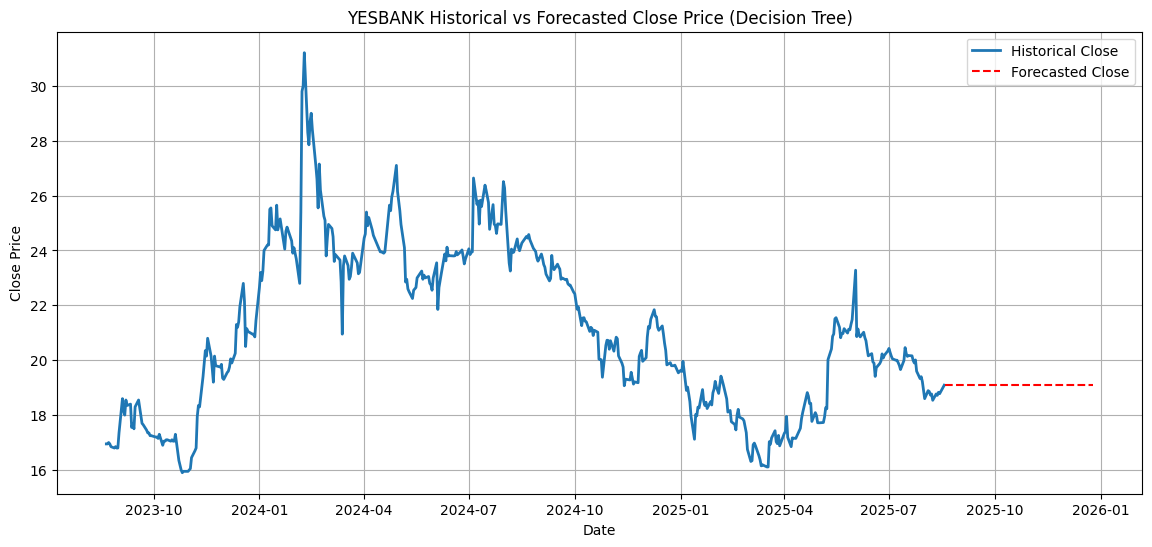

Predicted YESBANK Close Price on 25-12-2025: 19.09000015258789


In [257]:
#using decision tree
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

# Generate future dates till 25-12-2025
last_date_value = data["Date"].max() # Access the date value from the last row
future_end_date = datetime(2025, 12, 25)
future_dates = pd.date_range(start=last_date_value + timedelta(days=1), end=future_end_date)

# Use last known OHLCV as proxy for all future days
last_row = data.iloc[-1]
future_df = pd.DataFrame({
    "Date": future_dates,
    "Open": last_row["Open"],
    "High": last_row["High"],
    "Low": last_row["Low"],
    "Volume": last_row["Volume"]
})

# Add Date_ordinal
future_df["Date_ordinal"] = future_df["Date"].map(datetime.toordinal)

# Match feature order
X_future = future_df[["Date_ordinal", "Open", "High", "Low", "Volume"]]

# Scale
X_future_scaled = scaler_X.transform(X_future)

# Predict scaled Close
future_pred_scaled = load_tree_model.predict(X_future_scaled)

# Inverse transform to real Close
future_pred = scaler_Y.inverse_transform(future_pred_scaled.reshape(-1,1))

# Add predictions to DataFrame
future_df["Predicted_Close"] = future_pred

# Plot historical + forecast
plt.figure(figsize=(14,6))
plt.plot(data["Date"], data["Close"], label="Historical Close", linewidth=2)
plt.plot(future_df["Date"], future_df["Predicted_Close"], label="Forecasted Close", color="red", linestyle="--")

plt.title("YESBANK Historical vs Forecasted Close Price (Decision Tree)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Print predicted price for 25-12-2025
predicted_2025 = future_df.loc[future_df["Date"] == future_end_date, "Predicted_Close"].values[0]
print("Predicted YESBANK Close Price on 25-12-2025:", predicted_2025)